# Project Checkpoint

### Names: Pranav Nalamwar, Timothy Brown, Vincenzo Donofrio

### Project: Habitable Zone Predictions

# 1. Statement of Problem

The overall problem of this project is to analyze host star and exoplanet data to visualze the complete star system and its habitable zone.

This project is important because it allows the ability to visualize a plethora of somewhat confusing parameters all in one simple plot. More importantly, however, it allows our group the opportunity to analyze a difficult data set and produce results that make sense and can serve as sort of a basic handbook for the so far analyzed exoplanets. 

This project sparks interest in two aspects: its topic and its originality. The topic of creating habitable zones based on known data incites great interest to try and create a product that resembles reality. Additionally, the lack of truly reliable sources involving our objective that already exists allows us to sort of dive into the unknown and compare our nuanced approach to those limited others.

This project does, though, provide a higher level of difficulty for this course. Perhaps the most intensive part is not any of the coding (although it comes a close second), but the analysis of the involved data. This project requires us to iterate through enough data to reach a satisying conclusion, but at the same time not enough to avoid having to piece some of that data further together to reach that conclusion. To 'clean' this data will require basic to slightly higher level astrophysical knowledge which will increase the difficulty of this project. Addressing the coding of the project, as stated before, requires similar difficulty. To create an efficient model that iterates through the data and output all needed information will be difficult which is in addition to the multiple visual aids we sought for (2d + animated, 3d plus animated).   

Distribution of responsibilities:

We have highlighted a total of seven responsibilities that will be distributed evenly to the members of the group. Pranav will be responsible for collecting/cleaning the data and modeling; Vincenzo will be responsible for analyzing the data for the model and implementing both the relevant theoretical and experimental physics into the model. Tim will be responsible for the visualization(output) of the project, as well as testing every aspect of the output. As a group, every member is responsible for the report of the project.

# 2. Data We Will Use

The data we will use is titled the <em> Nasa Exoplanet Archive </em> (https://exoplanetarchive.ipac.caltech.edu). This data is likely the most qualified source on this topic. It has all the data needed and is included in an easy to read fashion. With that said, some of the data is left blank for what we can determine with two reasons. The first reason is that some of the data simply has not been collected yet as observing exoplanets is very young field, still. The other is that the source chose to leave some of the data out that can be calculated using the other data and few assumptions, a choice made probably because they would rather collect that data in time. To make up for this, we will make those few assumptions and calculate the few missing data with the known in our model which allows us to compute a more complete model.

Description: This dataset includes an up-to-date table of all the exoplanets observed. Each data point is recently updated to the best of its ability.

Below is the dataset; the columns used are the necessary inputs needed for the project (these were selected from the site specifically, with the other hundred or so columns dropped as they were unnecessary).

In [1]:
import pandas as pd

exoplanetdata = pd.read_csv('dataexoplanet.csv', skiprows = 18)
exoplanetdata

,pl_hostname,pl_name,pl_pnum,pl_orbper,pl_orbsmax,pl_orbeccen,pl_bmassj,pl_radj,st_teff,st_mass,st_rad,st_lum
0,11 Com,11 Com b,1,326.030000,1.290000,0.2310,19.4000,NaN,4742.0,2.70,19.00,2.243
1,11 UMi,11 UMi b,1,516.219970,1.530000,0.0800,14.7400,NaN,4213.0,2.78,29.79,NaN
2,14 And,14 And b,1,185.840000,0.830000,0.0000,4.8000,NaN,4813.0,2.20,11.00,1.763
3,14 Her,14 Her b,1,1773.400020,2.930000,0.3700,4.6600,NaN,5338.0,0.90,0.93,NaN
4,16 Cyg B,16 Cyg B b,1,798.500000,1.660000,0.6800,1.7800,NaN,5750.0,1.08,1.13,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
4136,tau Gem,tau Gem b,1,305.500000,1.170000,0.0310,20.6000,NaN,4388.0,2.30,26.80,NaN
4137,ups And,ups And b,3,4.617033,0.059222,0.0215,0.6876,NaN,NaN,1.30,1.56,NaN
4138,ups And,ups And c,3,241.258000,0.827774,0.2596,1.9810,NaN,NaN,1.30,1.56,NaN
4139,ups And,ups And d,3,1276.460000,2.513290,0.2987,4.1320,NaN,NaN,1.30,1.56,NaN


# 3. Model

The model we are starting off with is a basic API that is consisted more of 'hard-code' and loops. This model is so far sufficient for a 2D non-animated model, but we are currently working on transforming this model into a class/OOP API that is more efficient and will allow for an easier animation project.

# 4. Testing

# 5. Results

# 6. Conclusions

# Code

NGTS-6 has a luminosity of 0.256 Solar units
Star size is 0.75 Solar units
Star size is 0.05 map units
The inner limit is 0.455  AU; the outer limit is 0.759 AU
The eccentricity of the orbits: [0.0]
The exoplanets inlcude ['NGTS-6b']


,Surface Temperature (K),Jupyter-like?,Within Habitable Zone?,Habitable?
NGTS-6b,1385.72,Yes,No,No


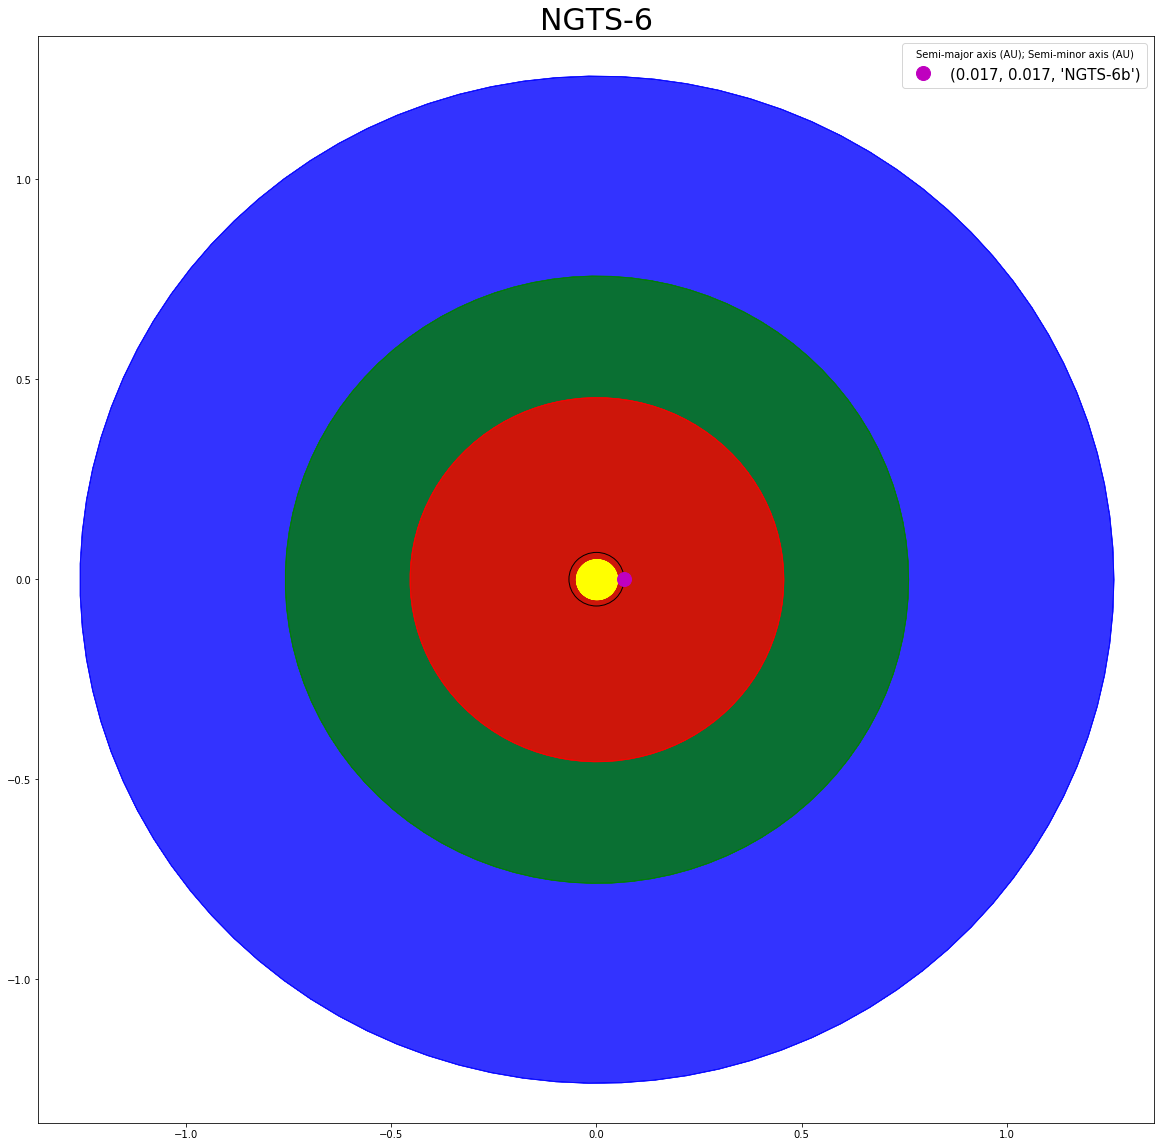

In [2]:
# 2D, non-animated
# imports
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import random 
import pandas as pd
from random import sample
from matplotlib.patches import Ellipse

# Setting up dataframe
exoplanetdata = pd.read_csv('dataexoplanet.csv', skiprows = 18) 
exoplanetdata['st_lum'] = exoplanetdata['st_lum'].fillna(0) # Changing nan to 0 for eaiser indexing
exoplanetdata['pl_orbsmax'] = exoplanetdata['pl_orbsmax'].fillna(0) # Changing nan to 0 for eaiser indexing
exoplanetdata['pl_radj'] = exoplanetdata['pl_radj'].fillna(0.25) # Changing nan to 0 for eaiser indexing
exoplanetdata['st_rad'] = exoplanetdata['st_rad'].fillna(1) # Changing nan to 1 for eaiser indexing
exoplanetdata['st_teff'] = exoplanetdata['st_teff'].fillna(4920) # Changing nan to 4920 K for eaiser indexing
exoplanetdata['pl_orbper'] = exoplanetdata['pl_orbper'].fillna(50) # Changing nan to 50 days for eaiser indexing
exoplanetdata['pl_orbeccen'] = exoplanetdata['pl_orbeccen'].fillna(0) # Changing nan to 0 for eaiser indexing
exoplanetdata['st_mass'] = exoplanetdata['st_mass'].fillna(1) # Changing nan to 0 for eaiser indexing
exoplanetdata['pl_bmassj'] = exoplanetdata['pl_bmassj'].fillna(0.5) # Changing nan to 0 for eaiser indexing

exoplanetdata = exoplanetdata.set_index('pl_hostname') 


# INPUT NECESSARY VALUES
#print('Input a star with known orbiting exoplanets. If you would like to explore a Kepler Star, input Kepler-(a value in') 
#print('most values in the range 4 to 1661) ex: Kepler-4. Few values in range not included, but most are. If not interested') 
#print('in Kepler, input a differently named host star.')
#Star_name = input()
Star_name = exoplanetdata.sample(1)
Star_name = Star_name.index[0]
#Star_name = ('{}'.format(Star_name))
# Locate star in dataframe
Kepler_star_data = exoplanetdata.loc[[Star_name]]


# Star Luminosity - Better way to do this??/ maybe not with current dataframe
# if originally no exact luminosity is presented in data seat, we can make a good estimate with L = R^2*T^4
Star_Luminosity = []

if Kepler_star_data['st_lum'].iloc[0] == 0: 
    Star_Luminosity.append((Kepler_star_data['st_rad'].iloc[0]**2)*((Kepler_star_data['st_teff'].iloc[0]/5778)**4))

else:
    Star_Luminosity.append(10**(Kepler_star_data['st_lum'].iloc[0])) 

Star_Luminosity = str(Star_Luminosity)
Star_Luminosity =  Star_Luminosity.strip('[').strip(']')
Star_Luminosity = round(float(Star_Luminosity),3)
print(Star_name,'has a luminosity of',Star_Luminosity, 'Solar units')

# star size (plot units; to show relative size of stars)
Star_size = []

if Kepler_star_data['st_rad'].iloc[0] >= 0 and Kepler_star_data['st_rad'].iloc[0] <= 1:
    Star_size.append(0.05)
elif Kepler_star_data['st_rad'].iloc[0] > 1 and Kepler_star_data['st_rad'].iloc[0] <= 2:
    Star_size.append(0.15)
elif Kepler_star_data['st_rad'].iloc[0] > 2 and Kepler_star_data['st_rad'].iloc[0] <= 5:
    Star_size.append(0.25)
elif Kepler_star_data['st_rad'].iloc[0] > 5 and Kepler_star_data['st_rad'].iloc[0] <= 10:
    Star_size.append(0.35)
elif Kepler_star_data['st_rad'].iloc[0] > 10:
    Star_size.append(0.45)

Star_size = str(Star_size)
Star_size =  Star_size.strip('[').strip(']')
Star_size = float(Star_size)
print('Star size is', Kepler_star_data['st_rad'].iloc[0],'Solar units')
print('Star size is',Star_size,'map units')

# Number of exoplanets - not needed for now
number_exo = Kepler_star_data['pl_pnum'].iloc[0]

# Exoplanet's semi-major axes
planet_axes_list = []
for i in range(len(Kepler_star_data['pl_orbsmax'])):
    if Kepler_star_data['pl_orbsmax'].iloc[i] == 0:
        axis = (((((Kepler_star_data['pl_orbper'].iloc[i]*86400)**2)*(6.67E-11)*(Kepler_star_data['st_mass'].iloc[i]*2E+30 + Kepler_star_data['pl_bmassj'].iloc[i]*1.898E+27))/(4*np.pi**2))**(1/3))/1.496E+11
        planet_axes_list.append(round(axis,3)) 
    
    else:
        planet_axes_list.append(round(Kepler_star_data['pl_orbsmax'].iloc[i],3))
planet_axes_list = sorted(planet_axes_list, key = lambda x:float(x))



# Habitable zone function
# Limits 0.9 and 1.5 are sourced from britannica.com (https://www.britannica.com/science/habitable-zone)
def habit_zone(L):
    # L input is given star's luminosity (in Solar units)
    Lsun = 1.0 # Luminosity of Sun (in Solar units)
    d_inner = round(0.9*(np.sqrt(L/Lsun)),3)
    #print('Inner limit is',d_inner,'AU')
    d_outer = round(1.5*(np.sqrt(L/Lsun)),3)
    #print('Outer limit is',d_outer,'AU')

    return d_inner, d_outer    

inner_limit = habit_zone(Star_Luminosity)[0]
outer_limit = habit_zone(Star_Luminosity)[1]

print('The inner limit is',inner_limit,' AU; the outer limit is', outer_limit, 'AU')

# ZONE HABITABILITY (Blue, Green, Red)

theta = np.linspace(0., 2.*np.pi, 100, endpoint=True) # For circle

x_red = inner_limit*np.cos(theta) # Red zone
y_red = inner_limit*np.sin(theta)

x_green = outer_limit*np.cos(theta) # Green zone
y_green = outer_limit*np.sin(theta)

x_blue = (outer_limit+0.5)*np.cos(theta) # Blue zone
y_blue = (outer_limit+0.5)*np.sin(theta) 

xsun = (Star_size)*np.cos(theta) # Sun 
ysun = (Star_size)*np.sin(theta)

# PLOTTING

fig, ax = plt.subplots(figsize=(20, 20)) 

#set the limits of the figure (based on last inputted radii)
ax.set_xlim(-outer_limit-0.6, outer_limit+0.6) 
ax.set_ylim(-outer_limit-0.6, outer_limit+0.6) 

# Fill in habitability zones based off limits 
ax.fill_between(x_blue, y_blue, -y_blue, color='blue',alpha=0.8)
ax.fill_between(x_green, y_green, -y_green, color='green',alpha=0.8)
ax.fill_between(x_red, y_red, -y_red, color='red',alpha=0.8)
ax.fill_between(xsun, ysun, -ysun, color='yellow')

# Creating data labels
planet_index = ['b','c','d','e','f','g','h','i','j','k']
planet_index_rows = []
for i in range(len(planet_axes_list)):
    index = Star_name + planet_index[i]
    planet_index_rows.append(index)

# Eccentricity
Eccen = []
for i in range(len(planet_axes_list)):
    Eccen.append(Kepler_star_data['pl_orbeccen'].iloc[i])

print('The eccentricity of the orbits:', Eccen)

semi_minor = []
for i in range(len(planet_axes_list)):
    semi_minor.append(round(planet_axes_list[i]*np.sqrt(1-Eccen[i]),3))

# Setting up orbits
Circle_list = []
for i in range(len(planet_axes_list)):
    if planet_axes_list[i] > Star_size: 
        Circle_index = Ellipse((0,0), width = planet_axes_list[i]*2, height = semi_minor[i]*2 , color='black', fill=False,alpha = 2,animated = True)
        Circle_list.append(Circle_index)

    elif planet_axes_list[i] <= Star_size:
        Circle_index = Ellipse((0,0), width = (planet_axes_list[i] + (xsun[0]))*2 ,height = (semi_minor[i] + xsun[0])*2,color='black', fill=False,alpha = 2,animated = True)
        Circle_list.append(Circle_index)
        

# Display orbits
for i in Circle_list:
    ax.add_artist(i)
    
# Add planet (circle) marker
colors_marker = ['bo','ro','go','co', 'mo', 'yo', 'ko','mo','co','yo'] # color of planet
colors_marker = sample(colors_marker, len(planet_axes_list))

marker_const_x = [1,-1,0,0,1,-1,0,0,1,-1]
marker_position_x = []
marker_position_x_sun = []
for i in range(len(planet_axes_list)):
    marker_position_x.append(planet_axes_list[i]*marker_const_x[i])
    marker_position_x_sun.append((planet_axes_list[i]+(Star_size))*marker_const_x[i])

marker_const_y = [0,0,1,-1,0,0,1,-1,0,0]
marker_position_y = []
marker_position_y_sun = []
for i in range(len(planet_axes_list)):
    marker_position_y.append(semi_minor[i]*marker_const_y[i])
    marker_position_y_sun.append((semi_minor[i]+(Star_size))*marker_const_y[i])


for i in range(len(planet_axes_list)):
    if planet_axes_list[i] > Star_size and Kepler_star_data['pl_radj'].iloc[i] < 0.5:
        plt.plot(marker_position_x[i],marker_position_y[i],colors_marker[i],ms = 8, label = (planet_axes_list[i],semi_minor[i],planet_index_rows[i]), alpha = 1)
    
    elif planet_axes_list[i] > Star_size and Kepler_star_data['pl_radj'].iloc[i] >= 0.5 and Kepler_star_data['pl_radj'].iloc[i] < 1.5:
        plt.plot(marker_position_x[i],marker_position_y[i],colors_marker[i],ms = 14, label = (planet_axes_list[i],semi_minor[i],planet_index_rows[i]), alpha = 1)
    
    elif planet_axes_list[i] > Star_size and Kepler_star_data['pl_radj'].iloc[i] >= 1.5:
        plt.plot(marker_position_x[i],marker_position_y[i],colors_marker[i],ms = 20, label = (planet_axes_list[i],semi_minor[i],planet_index_rows[i]), alpha = 1)   
    
    elif planet_axes_list[i] <= Star_size and Kepler_star_data['pl_radj'].iloc[i] < 0.5:
        plt.plot(marker_position_x_sun[i],marker_position_y_sun[i],colors_marker[i],ms = 8, label = (planet_axes_list[i],semi_minor[i],planet_index_rows[i]), alpha = 1)
    
    elif planet_axes_list[i] <= Star_size and Kepler_star_data['pl_radj'].iloc[i] >= 0.5 and Kepler_star_data['pl_radj'].iloc[i] < 1.5:
        plt.plot(marker_position_x_sun[i],marker_position_y_sun[i],colors_marker[i],ms = 14, label = (planet_axes_list[i],semi_minor[i],planet_index_rows[i]), alpha = 1)
    
    elif planet_axes_list[i] <= Star_size and Kepler_star_data['pl_radj'].iloc[i] >= 1.5:
        plt.plot(marker_position_x_sun[i],marker_position_y_sun[i],colors_marker[i],ms = 20, label = (planet_axes_list[i],semi_minor[i],planet_index_rows[i]), alpha = 1)

plt.legend(title="Semi-major axis (AU); Semi-minor axis (AU)",prop={'size': 15})
plt.title(Star_name, fontsize=30)
print('The exoplanets inlcude', planet_index_rows)


# ------------------------------------------------------------------------------------------------------------------
# Check if planets are habitable (temperature; 273 K to 373 K)
# We can approximate planet surface temperature with the equation: T_planet = T_star*(R_star/2*semi-major)**(1/2)*(1-A)**(1/4)
# A is the planets albedo - good estimate is 0.35
# We multiply by 215.032 because this is the factor to convert AU to Solar radius 

Planet_temp = []
A = 0.3 # albedo
for i in planet_axes_list:
    planet_temp = Kepler_star_data['st_teff'].iloc[0]*((Kepler_star_data['st_rad'].iloc[0]/(2*i*215.032))**(1/2)*(1-A)**(1/4))
    Planet_temp.append(round(planet_temp,2))

# If planet is within 0 and 100 Celsius and within the 'green' zone
Yes_No_list = []
for i in range(len(Planet_temp)):
    if Planet_temp[i] >= 273 and Planet_temp[i] <= 373 and planet_axes_list[i] >= inner_limit and planet_axes_list[i] <= outer_limit:
        Yes = 'Yes'
        Yes_No_list.append(Yes)
    elif Planet_temp[i] >= 200 and Planet_temp[i] <=450 and planet_axes_list[i] >= inner_limit and planet_axes_list[i] <= outer_limit:
        Maybe = 'Likely'
        Yes_No_list.append(Maybe)
    else:
        No = 'No'
        Yes_No_list.append(No)
        
Yes_No_list_Zone = []
for i in range(len(planet_axes_list)):
    if planet_axes_list[i] >= inner_limit and planet_axes_list[i] <= outer_limit:
        Yes = 'Yes'
        Yes_No_list_Zone.append(Yes)
    elif planet_axes_list[i] <= inner_limit or planet_axes_list[i] >= outer_limit:
        No = 'No'
        Yes_No_list_Zone.append(No)

Jupiter_list = []
for i in range(len(planet_axes_list)):
    if Kepler_star_data['pl_radj'].iloc[i] < 0.5:
        Smaller = 'Smaller'
        Jupiter_list.append(Smaller)
    elif Kepler_star_data['pl_radj'].iloc[i] >= 0.5 and Kepler_star_data['pl_radj'].iloc[i] < 1.5:
        Yes = 'Yes'
        Jupiter_list.append(Yes)
    elif Kepler_star_data['pl_radj'].iloc[i] >= 1.5:
        Larger = 'Larger'
        Jupiter_list.append(Larger)
    

# DataFrame of habitability check        
Habitability = pd.DataFrame(data = list(zip(Planet_temp,Jupiter_list,Yes_No_list_Zone,Yes_No_list)),index = planet_index_rows, columns = ['Surface Temperature (K)','Jupyter-like?', 'Within Habitable Zone?','Habitable?'])
display(Habitability)

plt.show()